# Quality Assessment for ERA5 Drought Indicator

Production date: DD-MM-YYYY

*Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch.*

Produced by: C3S2521 

## 🌍 Use case: Use case listed here in full 

## ❓ Quality assessment question
* **In most cases there should be one question listed here in bold**
* **(In some cases a second related/follow-up question may be included)**

**‘Context paragraph’ (no title/heading)** - a very short introduction before the assessment statement describing approach taken to answer the user question. One or two key references could be useful,  if the assessment summarises literature . These can be referenced directly in the text, like `[Rodriguez et. al. 2018](https://doi.org/10.1038/s41598-018-20628-2)` giving: [Rodriguez et. al. 2018](https://doi.org/10.1038/s41598-018-20628-2). For major references numerical labels like this should be used (which should also listed at the end) `Rodriguez et. al. 2018, [[1]](https://doi.org/10.1038/s41598-018-20628-2))`giving: Rodriguez et. al. 2018, [[1]](https://doi.org/10.1038/s41598-018-20628-2)). Please use DOI links where possible.


## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* Finding 1
* Finding 2
* Finding 3
* etc
```

## 📋 Methodology

A ‘free text’ introduction to the data analysis steps or a description of the literature synthesis, with a justification of the approach taken, and limitations mentioned. **Mention which CDS catalogue entry is used, including a link, and also any other entries used for the assessment**.

Followed by a numbered list of the methodology and results, with the same headings as the sections under ‘Analysis and Results’. These should be links to the sections below, using the format `[](section-label)`. The title of the section will be automatically populated, so no need to repeat the title of the section when referecing it like this.

```{note}
The section labels for the links need to be manually set, as seen below (`(section-1)=`, followed by the heading). These labels will be shown in GitHub but will not appear when the Jupyter Book page is built.
```

* These headings can be specific to the quality assessment, and help guide the user through the ‘story’ of the assessment. This means we cannot pre-define the sections and headings here, as they will be different for each assessment.
* Sub-bullets could be used to outline what will be done/shown/discussed in each section
* The list below is just an example, or may need more or fewer sections, with different headings

E.g. 'The analysis and results are organised in the following steps, which are detailed in the sections below:' 

**[](section-1)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-2)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-3)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-4)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.
 
**[](section-5)** 
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

Any further notes on the method could go here (explanations, caveats or limitations).

## 📈 Analysis and results

(section-1)=
### 1. Section 1 title

#### Subsections
Describe what is done in this step/section and what the `code` in the cell does (**if code is included** - some assessment may review literature or reports like PQARs for ECVs, in which case, a markdown file could be provided instead). Note that some details may be better placed in code comments, rather than in the text above the code cell, to help the flow of the Notebook.

**Code:**

* Cell output should be cleaned up as needed (right click the cell after it has run and delete the output if needed), this can also be done with the `'hide-output'` cell tag, added under 'Common Tools -> Cell Tags' on the right in Jupyter Lab (under the cog icon).
* Please consider when cell output would be useful to include, such as printing the summary of the xarray data cube, or an example image. 
* Please link to any non-standard libraries in the references, including the functions from B-Open (a standard line on this is included in the references section).
* The code cells will be adjusted to be 'collapsed by default' when the Jupyter Book page is built.

#### Import Libraries

In [1]:
# Input / Output
from pathlib import Path
import earthkit.data as ekd
import warnings

# General data handling
import numpy as np
import pandas as pd
import xarray as xr
from functools import partial

# Visualisation
import earthkit.plots as ekp
from earthkit.plots.styles import Style
import matplotlib.pyplot as plt
plt.rcParams["grid.linestyle"] = "--"
from tqdm import tqdm  # Progress bars

# Visualisation in Jupyter book -- automatically ignored otherwise
try:
    from myst_nb import glue
except ImportError:
    glue = None

import calendar
import earthkit.data
import scipy.stats as stats    

(section-2)=
### Calculating ERA5-Drought SPI

#### Reading in data from ERA5-Drought

#### Read in total precipitation data (monthly means) from ERA5 analysis. 
##### (https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-monthly-means?tab=download)

In [4]:
reanal_dataset = "reanalysis-era5-single-levels-monthly-means"
reanal_request = {
    "product_type": [
        "monthly_averaged_reanalysis"
    ],
    "variable": ["total_precipitation"],
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024", "2025"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "netcdf",
    "download_format": "unarchived"
}

In [5]:
era5_monthly_mean_reanal = ekd.from_source("cds", reanal_dataset, reanal_request) # Sends request for this dataset to CDS.
era5_monthly_mean_reanal = era5_monthly_mean_reanal.to_xarray(compat="equals")  # Converts to xarray.Dataset

2025-12-15 09:48:46,754 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.


In [6]:
def process_precipitation(data, var='tp', acc_periods=[1, 3, 6, 12, 24, 36, 48], time_dim=None):
    """
    Full workflow:
    1. Convert precipitation from meters to millimeters.
    2. Compute monthly totals (accounting for days in month).
    3. Add rolling accumulation windows on monthly totals.

    Parameters:
        data (xr.Dataset): Dataset with a time dimension ('valid_time' or 'forecast_reference_time') and variable var.
        var (str): Original variable name (e.g., 'tp').
        acc_periods (list): List of accumulation periods in months.
        time_dim (str): Name of the time dimension. If None, auto-detects between 'valid_time' and 'forecast_reference_time'.

    Returns:
        xr.Dataset: Dataset with tp_mm, tp_mm_monthly_total, and accumulation variables.
    """
    # Detect time dimension if not provided
    if time_dim is None:
        if 'valid_time' in data.dims:
            time_dim = 'valid_time'
        elif 'forecast_reference_time' in data.dims:
            time_dim = 'forecast_reference_time'
        else:
            raise ValueError("No valid time dimension found. Expected 'valid_time' or 'forecast_reference_time'.")

    # Ensure time is sorted
    data = data.sortby(time_dim)

    # Step 1: Convert to mm
    data['tp_mm'] = data[var] * 1000

    # Step 2: Compute monthly totals
    time_index = pd.to_datetime(data[time_dim].values)
    days_in_month = xr.DataArray(
        time_index.days_in_month,
        coords={time_dim: data[time_dim]},
        dims=[time_dim]
    )
    data['tp_mm_monthly_total'] = data['tp_mm'] * days_in_month

    # Step 3: Add rolling accumulation windows
    for period in acc_periods:
        rolling_sum = data['tp_mm_monthly_total'].rolling({time_dim: period}, center=False).sum()
        data[f'tp_mm_accum_{period}m'] = rolling_sum

    return data

def process_pev(data, var='pev', acc_periods=[1, 3, 6, 12, 24, 36, 48]):
    """
    Full workflow:
    1. Convert precipitation from meters to millimeters.
    2. Compute monthly totals (accounting for days in month).
    3. Add rolling accumulation windows on monthly totals.
    
    Parameters:
        data (xr.Dataset): Dataset with time dimension 'valid_time' and variable var.
        var (str): Original variable name (e.g., 'tp').
        acc_periods (list): List of accumulation periods in months.
    
    Returns:
        xr.Dataset: Dataset with tp_mm, tp_mm_monthly_total, and accumulation variables.
    """
    # Ensure time is sorted
    data = data.sortby('forecast_reference_time')
    
    # Step 1: Convert to mm
    data['pev_mm'] = data[var] * 1000
    
    # Step 2: Compute monthly totals
    time_index = pd.to_datetime(data['forecast_reference_time'].values)
    days_in_month = xr.DataArray(
        time_index.days_in_month,
        coords={'forecast_reference_time': data['forecast_reference_time']},
        dims=['forecast_reference_time']
    )
    data['pev_mm_monthly_total'] = data['pev_mm'] * days_in_month
    
    # Step 3: Add rolling accumulation windows
    for period in acc_periods:
        rolling_sum = data['pev_mm_monthly_total'].rolling(forecast_reference_time=period, center=False).sum()
        data[f'pev_mm_monthly_total{period}m'] = rolling_sum
    
    return data

#### Calculate moving average for different accumulation periods.

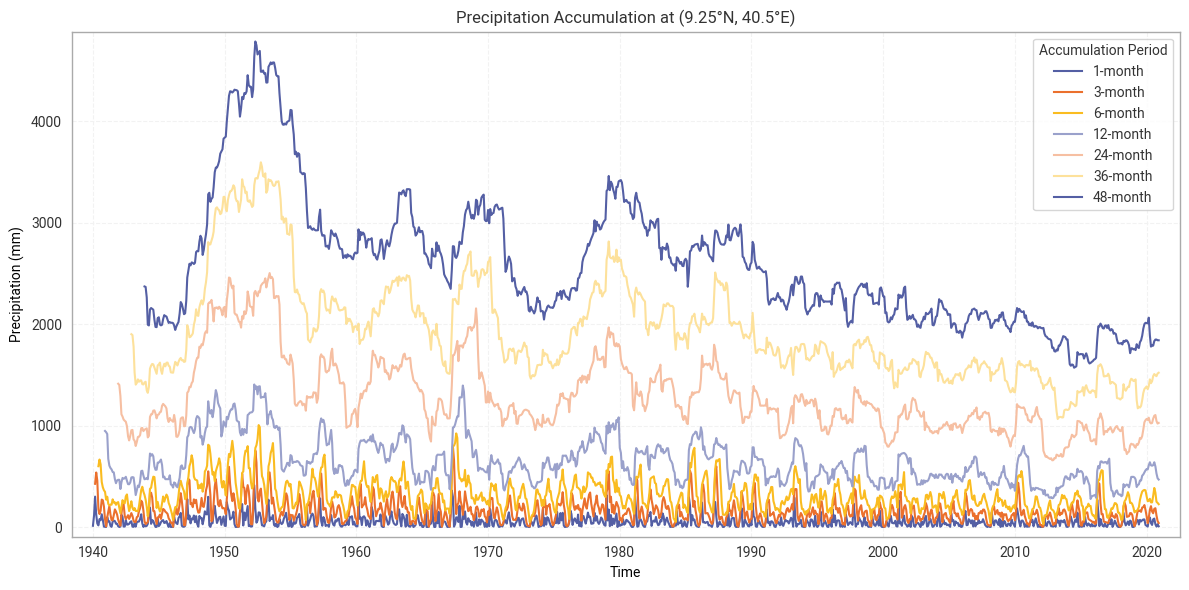

In [7]:
# Assume your dataset is called `data` and already has tp_mm and accumulation variables
# Example accumulation periods
acc_periods = [1, 3, 6, 12, 24, 36, 48]

# Select the grid point and time slice for Ethiopia

point_ds = era5_monthly_mean_reanal.sel(
    latitude=9.25, longitude=40.5, method='nearest'
).sel(valid_time=slice("1940-01-01", "2020-12-31"))

point_ds = process_precipitation(point_ds)

plt.figure(figsize=(12, 6))
for p in acc_periods:
    var_name = f'tp_mm_accum_{p}m'
    plt.plot(point_ds['valid_time'].values, point_ds[var_name].values, label=f'{p}-month')

# Customize plot
plt.title('Precipitation Accumulation at (9.25°N, 40.5°E)')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.legend(title='Accumulation Period')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Functions to fit gamma distribution (over calendar months) to different accumulation periods.

In [8]:
from scipy.stats import fisk

def fit_monthly_gamma_distributions_xr(data, accum_periods, start_ref, end_ref, time_dim=None):
    """
    Fit gamma distributions for each month and accumulation period using xarray.
    """
    import numpy as np
    from scipy import stats

    gamma_monthly_params = {}

    # Detect time dimension if not provided
    if time_dim is None:
        if 'valid_time' in data.dims:
            time_dim = 'valid_time'
        elif 'forecast_reference_time' in data.dims:
            time_dim = 'forecast_reference_time'
        else:
            raise ValueError("No valid time dimension found. Expected 'valid_time' or 'forecast_reference_time'.")

    # Slice reference period
    ref_data = data.sel({time_dim: slice(start_ref, end_ref)})

    for period in accum_periods:
        var_name = f'tp_mm_accum_{period}m'
        for month in range(1, 13):

            # Select month subset
            month_subset = ref_data[var_name].where(ref_data[time_dim].dt.month == month, drop=True)

            # Drop NaNs and flatten
            values = month_subset.values.flatten()
            values = values[~np.isnan(values)]
            if len(values) > 0:
                alpha, loc, beta = stats.gamma.fit(values)
                gamma_monthly_params[(month, period)] = (alpha, loc, beta)

    return gamma_monthly_params

def fit_monthly_log_distributions_xr(data, accum_periods, start_ref, end_ref):
    """
    Fit gamma distributions for each month and accumulation period using xarray.
    """
    fisk_monthly_params = {}
    
    # Slice reference period
    ref_data = data.sel(forecast_reference_time=slice(start_ref, end_ref))
    
    for period in accum_periods:
        var_name = f'wb_mm_accum_{period}m'
        for month in range(1, 13):
            
            # Select month subset
            month_subset = ref_data[var_name].where(ref_data['forecast_reference_time.month'] == month, drop=True)
            
            # Drop NaNs and flatten
            values = month_subset.values.flatten()
            values = values[~np.isnan(values)]
            
            if len(values) > 0:
                alpha, loc, beta = stats.fisk.fit(values, method = "MLE")
                fisk_monthly_params[(month, period)] = (alpha, loc, beta)
                
    return fisk_monthly_params

def compute_monthly_spi_series_xr(data, accum_periods, gamma_monthly_params, time_dim=None):
    """
    Compute SPI time series for each accumulation period using fitted gamma parameters.
    Returns an xarray Dataset with SPI variables.
    """
    import numpy as np
    import xarray as xr
    from scipy import stats

    # Detect time dimension if not provided
    if time_dim is None:
        if 'valid_time' in data.dims:
            time_dim = 'valid_time'
        elif 'forecast_reference_time' in data.dims:
            time_dim = 'forecast_reference_time'
        else:
            raise ValueError("No valid time dimension found. Expected 'valid_time' or 'forecast_reference_time'.")

    spi_vars = {}
    cdf_vars = {}

    for period in accum_periods:
        var_name = f'tp_mm_accum_{period}m'

        spi_array = xr.full_like(data[var_name], np.nan)
        cdf_array = xr.full_like(data[var_name], np.nan)

        for month in range(1, 13):
            alpha, loc, beta = gamma_monthly_params[(month, period)]

            # Select month subset
            months = data[time_dim].dt.month
            month_mask = (months == month)

            values = data[var_name].where(month_mask)

            # Compute CDF and SPI
            cdf = stats.gamma.cdf(values, a=alpha, loc=loc, scale=beta)
            spi = stats.norm.ppf(cdf, loc=0, scale=1)

            # Assign values to arrays
            spi_array = spi_array.where(~month_mask, spi)
            cdf_array = cdf_array.where(~month_mask, cdf)

        spi_vars[f'SPI_{period}m'] = spi_array
        cdf_vars[f'CDF_{period}m'] = cdf_array

    return xr.Dataset(spi_vars, coords=data.coords), xr.Dataset(cdf_vars, coords=data.coords)

def compute_monthly_spei_series_xr(data, accum_periods, fisk_monthly_params):
    """
    Compute SPI time series for each accumulation period using fitted gamma parameters.
    Returns an xarray Dataset with SPI variables.
    """
    spei_vars = {}
    cdf_vars = {}
    
    for period in accum_periods:
        var_name = f'wb_mm_accum_{period}m'
        
        spei_array = xr.full_like(data[var_name], np.nan)
        cdf_array = xr.full_like(data[var_name], np.nan)

        for month in range(1, 13):
            
            alpha, loc, beta = fisk_monthly_params[(month, period)]
            
            # Select month subset

            months = data['forecast_reference_time'].dt.month
            month_mask = (months == month)
            
            values = data[var_name].where(month_mask)
            
            # Compute CDF and SPI
            cdf = stats.fisk.cdf(values, c=alpha, loc=loc, scale=beta)
            spei = stats.norm.ppf(cdf)
            pdf = stats.fisk.pdf(values, c=alpha, loc=loc, scale=beta)
            
            # Assign values to arrays
            spei_array = spei_array.where(~month_mask, spei)
            cdf_array = cdf_array.where(~month_mask, cdf)

        spei_vars[f'SPEI_{period}m'] = spei_array
        cdf_vars[f'CDF_{period}m'] = cdf_array

    return xr.Dataset(spei_vars, coords=data.coords), xr.Dataset(cdf_vars, coords=data.coords)


def compute_spi_dataset(data, accum_periods, n_points = 1000):

    """
    Fit gamma distribution for each month and accumulation period,
    then compute SPI, CDF, and PDF for a linspace of precipitation values.
    
    Parameters
    ----------
    data : xarray.Dataset
        Dataset containing precipitation variables like 'tp_mm_accum_{period}m'.
    accum_periods : list
        List of accumulation periods (e.g., [1, 3, 6]).
    n_points : int
        Number of points in the linspace for precipitation values.
    
    Returns
    -------
    xr.Dataset
        Dataset with SPI, CDF, PDF arrays for each month and accumulation period.
    """

    result_vars = {}

    for period in accum_periods:
        var_name = f'tp_mm_accum_{period}m'
        
        tp_values = data[var_name]

        # Prepare storage lists
        spi_list, cdf_list, pdf_list, precip_list = [], [], [], []

        for month in range(1, 13):
            # Select month subset
            month_data = tp_values.where(tp_values['valid_time.month'] == month, drop=True).values
            month_data = month_data[month_data > 0]                
            month_data = month_data[~np.isnan(month_data)]

                
            # Fit gamma distribution
            alpha, loc, beta = stats.gamma.fit(month_data, floc=0)

            vals = np.linspace(month_data.min(), month_data.max(), n_points)

            # Compute PDF, CDF, SPI
            cdf_vals = stats.gamma.cdf(vals, a=alpha, loc=loc, scale=beta)
            spi_vals = stats.norm.ppf(cdf_vals)
            pdf_vals = stats.gamma.pdf(vals, a=alpha, loc=loc, scale=beta)

            # Append to lists
            precip_list.append(vals)
            spi_list.append(spi_vals)
            cdf_list.append(cdf_vals)
            pdf_list.append(pdf_vals)

            
        # Convert lists to DataArrays
        months = np.arange(1, 13)
        result_vars[f'precip_{period}m'] = xr.DataArray(precip_list, dims=['month', 'value_index'], coords={'month': months})
        result_vars[f'SPI_{period}m'] = xr.DataArray(spi_list, dims=['month', 'value_index'], coords={'month': months})
        result_vars[f'CDF_{period}m'] = xr.DataArray(cdf_list, dims=['month', 'value_index'], coords={'month': months})
        result_vars[f'PDF_{period}m'] = xr.DataArray(pdf_list, dims=['month', 'value_index'], coords={'month': months})

    return xr.Dataset(result_vars)


#### Fit gamma distribution (over calendar months) to different accumulation periods.

In [9]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]

start_ref, end_ref  = "1991-01-01", "2020-12-01"

# Fit gamma distributions
gamma_params = fit_monthly_gamma_distributions_xr(point_ds, accum_periods, start_ref, end_ref)

#### Compute SPI series


In [10]:
# Compute SPI series
spi_ds, cdf_ds = compute_monthly_spi_series_xr(point_ds, accum_periods, gamma_params)

#### Compute SPI, CDF and PDF for a 1000 tp values between max and min.

In [11]:
# Compute SPI, CDF and PDF for each tp value.
ds_tp = compute_spi_dataset(point_ds, accum_periods)

#### Uncertainty in SPI vs Precipitation — January (all accumulation windows)

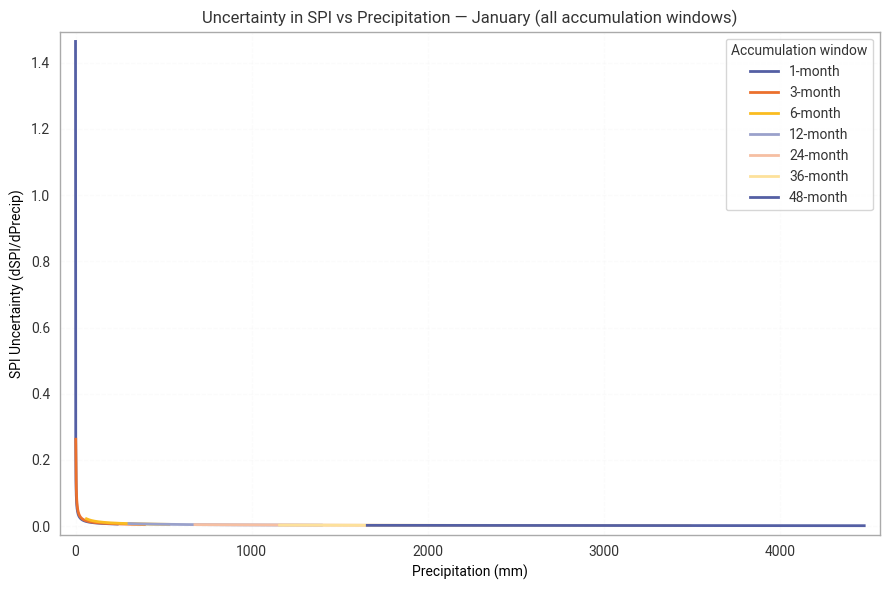

In [17]:
from scipy.interpolate import make_interp_spline
import re

# Find matching precip/SPI variable pairs like precip_1m / SPI_1m
precip_vars = {int(re.search(r'_(\d+)m$', v).group(1)): v
               for v in ds_tp.data_vars if re.fullmatch(r'precip_\d+m', v)}
spi_vars    = {int(re.search(r'_(\d+)m$', v).group(1)): v
               for v in ds_tp.data_vars if re.fullmatch(r'SPI_\d+m', v)}

windows = sorted(set(precip_vars) & set(spi_vars))

plt.figure(figsize=(9, 6))
for w in windows:
    tp = ds_tp[precip_vars[w]].sel(month=2).values.ravel()
    spi = ds_tp[spi_vars[w]].sel(month=2).values.ravel()
    idx = np.argsort(tp)
    tp = tp[idx]
    spi = spi[idx]
    grad = np.gradient(spi, tp)
    plt.plot(tp, grad, linewidth=2, label=f"{w}-month")

plt.xlabel("Precipitation (mm)")
plt.ylabel("SPI Uncertainty (dSPI/dPrecip)")
plt.title("Uncertainty in SPI vs Precipitation — January (all accumulation windows)")
plt.grid(True, alpha=0.3)
plt.legend(title="Accumulation window")
plt.tight_layout()
plt.show()


#TODO: Might be good to have some dropdowns so users can look at the month / accumulation period of choice.

#### Uncertainty in SPI vs Precipitation - all 12 months on the same axes for a single accumulation window

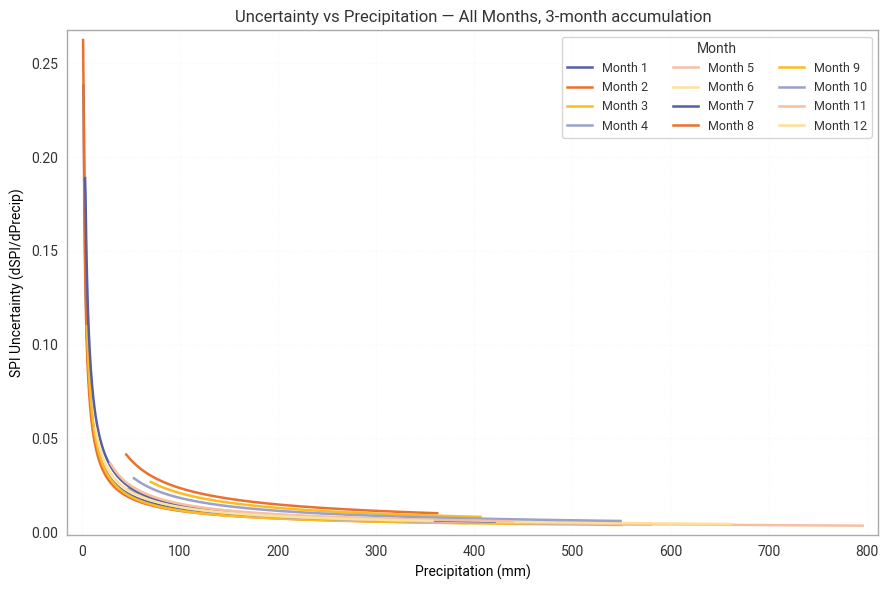

In [23]:
w = 3  # accumulation window in months (e.g., 1, 3, 6, 12)

precip_var = next(v for v in ds_tp.data_vars if re.fullmatch(rf'precip_{w}m', v))
spi_var    = next(v for v in ds_tp.data_vars if re.fullmatch(rf'SPI_{w}m', v))

plt.figure(figsize=(9, 6))
for m in range(1, 13):
    tp  = ds_tp[precip_var].sel(month=m).values.ravel()
    spi = ds_tp[spi_var].sel(month=m).values.ravel()
    idx = np.argsort(tp)
    tp, spi = tp[idx], spi[idx]
    grad = np.gradient(spi, tp)
    plt.plot(tp, grad, linewidth=1.8, label=f"Month {m}")

plt.xlabel("Precipitation (mm)")
plt.ylabel("SPI Uncertainty (dSPI/dPrecip)")
plt.title(f"Uncertainty vs Precipitation — All Months, {w}-month accumulation")
plt.grid(True, alpha=0.3)
plt.legend(ncol=3, fontsize=9, title="Month")
plt.tight_layout()
plt.show()


#### Real distribution of preciptiations (ref period) with fitted gamma distribution (CDF, SPI vs Precipitation).

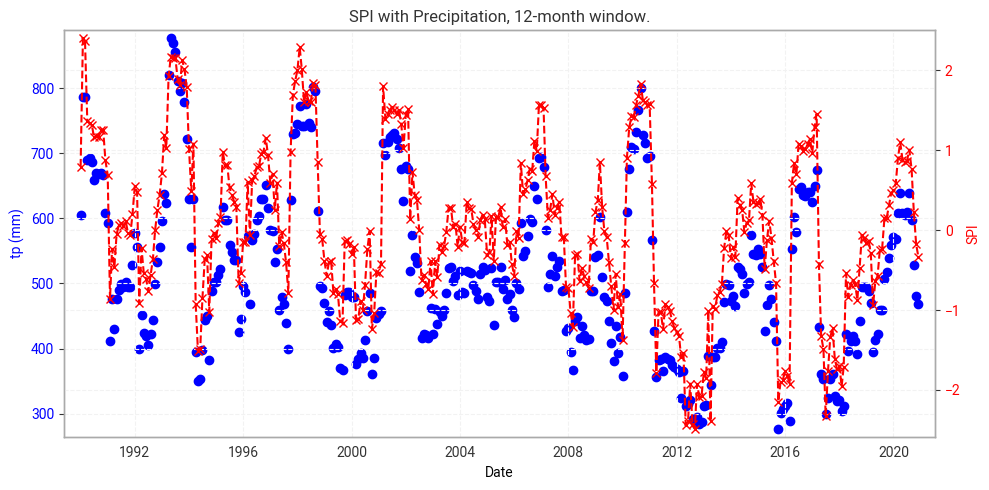

In [92]:
month_choice = 12
tp_choice = point_ds[f"tp_mm_accum_{month_choice}m"].sel(valid_time=slice("1990-01-01", "2020-12-31"))
spi_choice = spi_ds[f"SPI_{month_choice}m"].sel(valid_time=slice("1990-01-01", "2020-12-31"))
cdf_choice = cdf_ds[f"CDF_{month_choice}m"].sel(valid_time=slice("1990-01-01", "2020-12-31"))

fig, ax1 = plt.subplots(figsize=(10, 5))

# First axis (left)
color1 = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('tp (mm)', color=color1)
ax1.scatter(tp_choice.valid_time, tp_choice.values, color=color1, linestyle='-', marker='o', label='DF Ref')
ax1.tick_params(axis='y', labelcolor=color1)

# Second axis (right)
ax2 = ax1.twinx()  # Create second y-axis
color2 = "red"
ax2.set_ylabel('SPI', color=color2)
ax2.plot(spi_choice.valid_time, spi_choice.values, color=color2, linestyle='--', marker='x', label='SPI Ref')
ax2.tick_params(axis='y', labelcolor=color2)

# Title and grid
plt.title(f'SPI with Precipitation, {month_choice}-month window.')
fig.tight_layout()
plt.show()


#### Calculating historical ratio of months without precipitation and finding zero adjusted SPI (ref dataset)

In [155]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]

def zero_precip_monthly_xr(data, cdf_spi_ds, accum_periods, start_ref="1991-01-01", end_ref="2020-12-01"):
    """
    Adjust CDF for zero precipitation probability in xarray.
    
    Parameters:
        data (xr.Dataset): Original dataset with accumulation variables.
        cdf_spi_ds (xr.Dataset): Dataset with CDF values for SPI.
        accum_periods (list): Accumulation periods in months.
        start_ref, end_ref (str): Reference period for zero-precip stats.
    
    Returns:
        stats_summary_df (pd.DataFrame): Summary stats for zero precipitation.
        adjusted_cdf_ds (xr.Dataset): Dataset with adjusted CDF values.
    """
    # Slice reference period
    ref_data = data.sel(valid_time=slice(start_ref, end_ref))
    
    adjusted_cdf_vars = {}
    stats_summary = []

    for period in accum_periods:
        var_name = f'tp_mm_accum_{period}m'
        cdf_var = f'CDF_{period}m'
        adjusted_cdf = cdf_spi_ds[cdf_var].copy()

        for month in range(1, 13):
            # Select month subset
            month_subset = ref_data[var_name].where(ref_data['valid_time.month'] == month, drop=True)
            n_zero = (month_subset == 0).sum().compute().item()
            n_month = month_subset.count().compute().item()

            # Probability of zero precipitation
            p_zero = (n_zero + 1) / (2 * (n_month + 1))
            
            ratio_zero = n_zero / n_month

            # Adjust CDF for this month
            mask = data['valid_time.month'] == month
            adjusted_cdf = adjusted_cdf.where(~mask, p_zero + (1 - p_zero) * cdf_spi_ds[cdf_var])

            # Append summary
            stats_summary.append({
                "Month": month,
                "SPI": period,
                "Zero-Precip Count": int(n_zero),
                "Total Months": int(n_month),
                "Prob Zero Precip": p_zero,
                "Historical Ratio": ratio_zero,
            })

        adjusted_cdf_vars[cdf_var] = adjusted_cdf

    stats_summary_df = pd.DataFrame(stats_summary)
    adjusted_cdf_ds = xr.Dataset(adjusted_cdf_vars, coords=data.coords)

    return stats_summary_df, adjusted_cdf_ds

In [153]:
stats_sum, adjusted_cdf_ds = zero_precip_monthly_xr(point_ds, cdf_ds, accum_periods)

In [154]:
stats_sum[stats_sum["SPI"]==1]

,Month,SPI,Zero-Precip Count,Total Months,Prob Zero Precip,Historical Ratio
0,1,1,2,30,0.048387,0.066667
1,2,1,0,30,0.016129,0.000000
2,3,1,0,30,0.016129,0.000000
3,4,1,0,30,0.016129,0.000000
4,5,1,0,30,0.016129,0.000000
5,6,1,0,30,0.016129,0.000000
6,7,1,0,30,0.016129,0.000000
7,8,1,0,30,0.016129,0.000000
8,9,1,0,30,0.016129,0.000000
9,10,1,0,30,0.016129,0.000000


#### ERA5- Probability of zero precipitation.

In [146]:
dataset = "derived-drought-historical-monthly"
request = {
    "variable": ["probability_of_zero_precipitation_spi"],
    "accumulation_period": [
        "1",
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ]
}

In [147]:
era5_zero_precip = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
era5_zero_precip = era5_zero_precip.to_xarray(compat="equals") # Converts to xarray.
era5_zero_precip.sel(lat=9.25, lon= 40.5).compute()

<xarray.Dataset> Size: 208B
Dimensions:  (time: 12)
Coordinates:
  * time     (time) datetime64[ns] 96B 2020-01-01 2020-02-01 ... 2020-12-01
    lon      float64 8B 40.5
    lat      float64 8B 9.25
Data variables:
    pzero    (time) float64 96B 0.06452 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.06452
Attributes: (12/19)
    CDI:                     Climate Data Interface version 1.9.10 (https://m...
    Conventions:             CF-1.8
    source:                  DRYFALL v1.0
    institution:             European Centre for Medium-Range Weather Forecasts
    title:                   Quality criteria for the derived standardized dr...
    description:             Monthly quality criteria that define the reliabi...
    ...                      ...
    resolution:              0.25x0.25
    climate_start_date:      1991-01-01
    climate_end_date:        2020-12-31
    frequency:               Monthly
    contact_person:          support@ecmwf.int
    CDO:                     Climate Data Operators version 1.9.10 (https://m...

#### SPI Test of Normality: Shapiro-Wilks Test
##### Quality parameter set to:
##### 0 (rejection) - if p-value < alpha = 0.05, 
##### 1 (accepted) - if p-value > alpha = 0.05.

#### Shapiro-Wilks Test Functions

In [121]:
def shapiro_monthly_test(spi_ds, accum_periods = [1, 3, 6, 12, 24, 36, 48], months = range(1,13)):
    results = []
    # spi_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    spi_ref = spi_ds.sel(valid_time=slice("1990-01-01", "2020-12-31"))
    for period in accum_periods:
        data = spi_ds[f"SPI_{period}m"]
        for month in months:
            month_data = data.where(data.valid_time.dt.month == month, drop=True).values
            month_data = month_data[np.isfinite(month_data)]  # remove inf/-inf

            stat, pval = stats.shapiro(month_data,nan_policy="omit")
            normality = 0 if pval < 0.05 else 1

            results.append((month, period, stat, pval,normality))
        
    # Convert to DataFrame
    df_shapiro_results = pd.DataFrame(results, columns=["Month", "SPI", "Statistic", "P-Value","Normality"])

    return df_shapiro_results

#### Calculated Shapiro-Wilks Test Result

In [142]:
df_shapiro_results = shapiro_monthly_test(spi_ds)

In [143]:
df_shapiro_results = df_shapiro_results.loc[df_shapiro_results["SPI"]==12]
df_shapiro_results

,Month,SPI,Statistic,P-Value,Normality
36,1,12,0.928055,0.000233,0
37,2,12,0.952391,0.004736,0
38,3,12,0.950677,0.003769,0
39,4,12,0.991481,0.884448,1
40,5,12,0.992613,0.931639,1
41,6,12,0.992475,0.926145,1
42,7,12,0.985831,0.524297,1
43,8,12,0.989433,0.759193,1
44,9,12,0.992276,0.917793,1
45,10,12,0.976422,0.145733,1


#### ERA5 Shapiro-Wilks Test 

In [136]:
dataset = "derived-drought-historical-monthly"
request = {
    "variable": ["test_for_normality_spi"],
    "accumulation_period": [
        "12",
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ]
}

In [137]:
quality_spi = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
quality_spi = quality_spi.to_xarray(compat="equals") # Converts to xarray.
quality_spi=quality_spi.sel(lat=9.25,lon=40.5, method="nearest")

2025-11-28 15:50:36,664 WARNING [2025-10-30T00:00:00] Downloading data from this dataset requires that the user be registered with the CDS. The use of the API requires a CDS API key.
2025-11-28 15:50:36,666 INFO Request ID is 882bb620-255f-47ce-8af0-2db2837d78cc
2025-11-28 15:50:36,753 INFO status has been updated to accepted
Recovering from HTTP error [500 Internal Server Error], attempt 1 of 500
Retrying in 120 seconds
2025-11-28 15:53:38,428 INFO status has been updated to successful
                                                                                                                        

#### Caclulated vs ERA5 Shapiro-Wilks Test 

In [138]:
quality_spi["significance"].compute()
# df_shapiro_results
# # quality_spi["significance"].compute()

<xarray.DataArray 'significance' (time: 12)> Size: 96B
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Coordinates:
  * time     (time) datetime64[ns] 96B 2020-01-01 2020-02-01 ... 2020-12-01
    lon      float64 8B 40.5
    lat      float64 8B 9.25
Attributes:
    long_name:  Quality flag that indicates the acceptance of a Shapiro-Wilks...
    units:      1

#### Check calculated SPI against given (one location).

In [28]:
dataset = "derived-drought-historical-monthly"

request1 = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": [
        "1",
        "3",
        "6",
        "12",
        "24",
        "36",
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [9.45, 40.25, 8.95, 40.75]
}

request2 = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": [
        "1",
        "3",
        "6",
        "12",
        "24",
        "36",
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1981", "1982", "1983",
        "1984", "1985", "1986",
        "1987", "1988", "1989",
        "1990", "1991", "1992",
        "1993", "1994", "1995",
        "1996", "1997", "1998",
        "1999", "2000", "2001",
        "2002", "2003", "2004",
        "2005", "2006", "2007",
        "2008", "2009", "2010",
        "2011", "2012", "2013",
        "2014", "2015", "2016",
        "2017", "2018", "2019",
        "2020"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [9.45, 40.25, 8.95, 40.75] # Ethiopia
}

In [29]:
data_drought = ekd.from_source("cds", dataset, request1,request2) # Sends request for this dataset to CDS.
data_drought = data_drought.to_xarray(compat="equals") # Converts to xarray.
data_drought = data_drought.sel(lat=9.25,lon=40.5, method="nearest")

2025-12-10 15:43:38,497 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 401.75it/s]
/home/eg6/c3s2-eqc-quality-assessment/.venv/lib/python3.12/site-packages/earthkit/data/readers/netcdf/fieldlist.py:202: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',) The recommendation is to set join explicitly for this case.
  return xr.open_mfdataset(


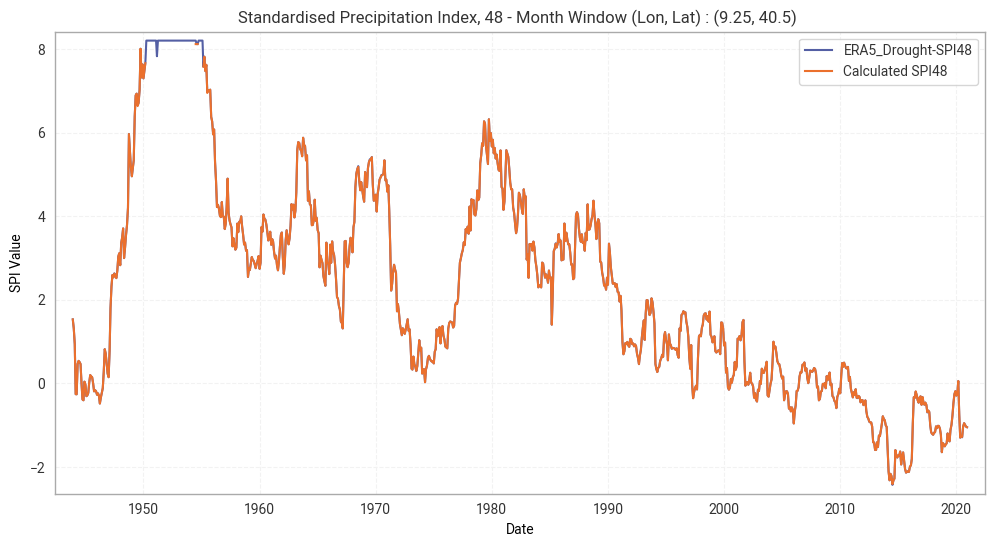

In [62]:
plt.figure(figsize=(12, 6))
accum_periods=[48]
for period in accum_periods:
    # plt.plot(spi_calculated_monthly_shifted[f"SPI{period}"],spi_calculated_monthly_shifted[f"SPI{period}"]-data_drought[f"SPI{period}"], label=f"Calculated-SPI{period}")
    plt.plot(data_drought[f"SPI{period}"].time, data_drought[f"SPI{period}"], label=f"ERA5_Drought-SPI{period}")
    plt.plot(spi_ds[f"SPI_{period}m"].valid_time, spi_ds[f"SPI_{period}m"], label=f"Calculated SPI{period}")
    
plt.legend()
plt.title("Standardised Precipitation Index, 48 - Month Window (Lon, Lat) : (9.25, 40.5) ")
plt.xlabel("Date")
plt.ylabel("SPI Value")
plt.grid(True)
plt.show()

(section-3)=
###  Calculating ERA5-Drought SPEI
#### 


#### Read in SPEI data.

In [54]:
data_spei = ekd.from_source("cds", dataset, request1,request2) # Sends request for this dataset to CDS.
data_spei = data_spei.to_xarray(compat="equals") # Converts to xarray.
data_spei = data_spei.sel(lat=9.25,lon=40.5, method="nearest")

2025-12-10 15:52:06,588 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 183.63it/s]
/home/eg6/c3s2-eqc-quality-assessment/.venv/lib/python3.12/site-packages/earthkit/data/readers/netcdf/fieldlist.py:202: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',) The recommendation is to set join explicitly for this case.
  return xr.open_mfdataset(


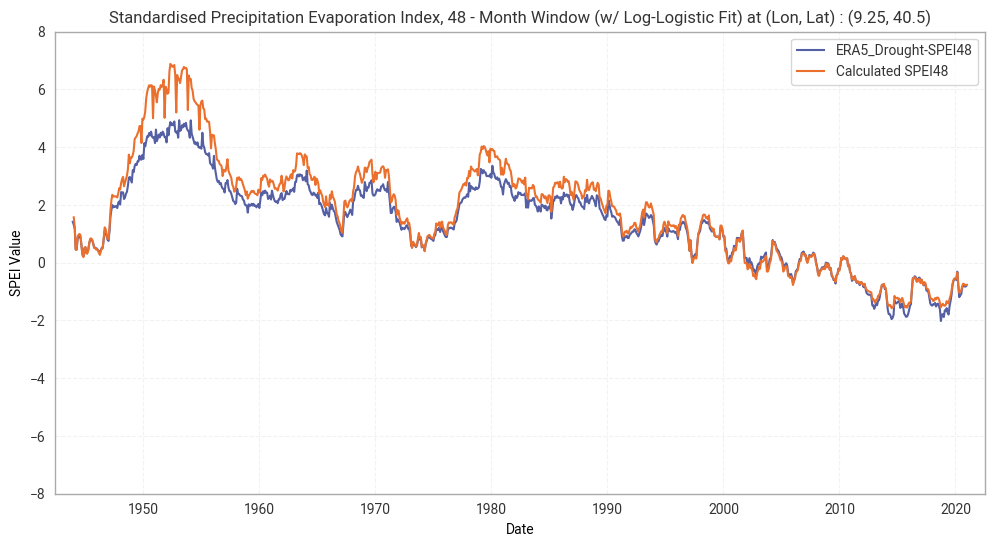

In [61]:
plt.figure(figsize=(12, 6))
accum_periods=[48]
for period in accum_periods:
    plt.plot(data_spei['time'].values, data_spei[f"SPEI{period}"], label=f"ERA5_Drought-SPEI{period}")
    plt.plot(spei_ds['forecast_reference_time'].values, -spei_ds[f"SPEI_{period}m"], label=f"Calculated SPEI{period}")
    
plt.legend()
plt.title(f"Standardised Precipitation Evaporation Index, 48 - Month Window (w/ Log-Logistic Fit) at (Lon, Lat) : (9.25, 40.5)")
plt.xlabel("Date")
plt.ylabel("SPEI Value")
plt.ylim([-8, 8])
plt.grid(True)
plt.show()

In [ ]:
# collapsable code cells

# code is included for transparency but also learning purposes and gives users the chance to adapt the code used for the assessment as they wish

#### Reading in Precipitation & PEV Data.

In [39]:
dataset = "reanalysis-era5-single-levels-monthly-means"
request = {
    "product_type": ["monthly_averaged_reanalysis"],
    "variable": [
        "total_precipitation",
    ],
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024", "2025"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "grib",
    "download_format": "unarchived"
}

In [40]:
tp_rean_precip = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
tp_rean_precip = tp_rean_precip.to_xarray() # Converts to xarray.

2025-12-10 15:49:28,102 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.


In [41]:
tp_rean_precip = tp_rean_precip.sel(
    latitude=9.25, longitude=40.5, method='nearest'
).sel(forecast_reference_time=slice("1940-01-01", "2020-12-31"))

In [42]:
monthly_sum_prec_reanal = process_precipitation(tp_rean_precip)

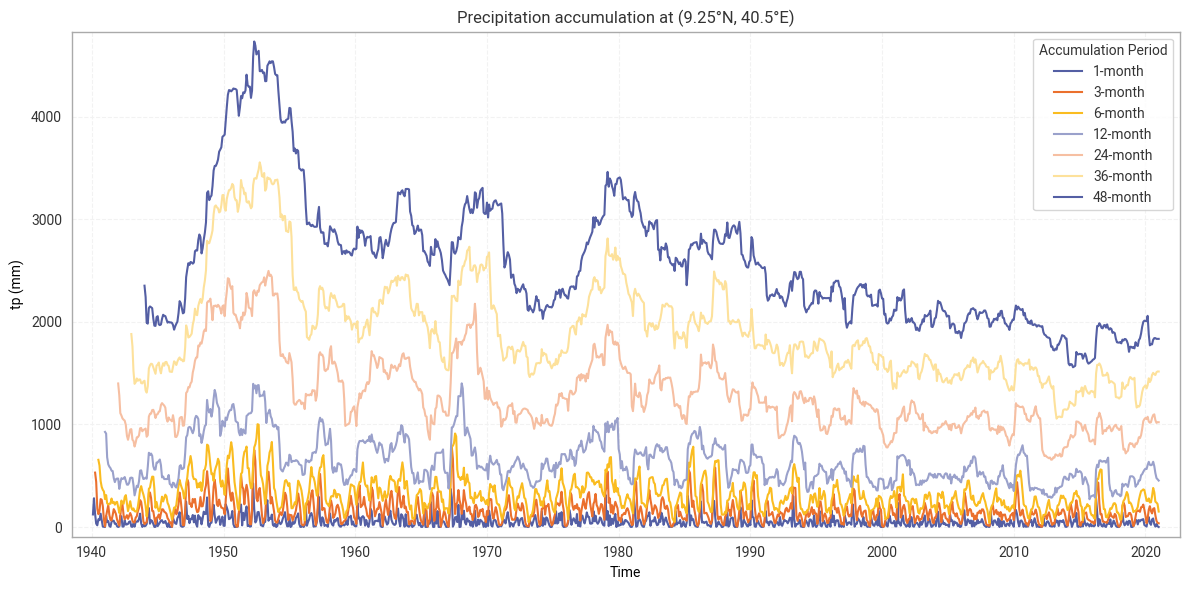

In [43]:
# Assume your dataset is called `data` and already has tp_mm and accumulation variables
# Example accumulation periods
acc_periods = [1, 3, 6, 12, 24, 36, 48]

# Select the grid point and time slice for Ethiopia

point_ds = monthly_sum_prec_reanal

plt.figure(figsize=(12, 6))
for p in acc_periods:
    var_name = f'tp_mm_accum_{p}m'
    plt.plot(point_ds['forecast_reference_time'].values, point_ds[var_name].values, label=f'{p}-month')

# Customize plot
plt.title('Precipitation accumulation at (9.25°N, 40.5°E)')
plt.xlabel('Time')
plt.ylabel('tp (mm)')
plt.legend(title='Accumulation Period')
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
dataset = "reanalysis-era5-single-levels-monthly-means"
request = {
    "product_type": ["monthly_averaged_reanalysis"],
    "variable": [
        "potential_evaporation"
    ],
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024", "2025"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "grib",
    "download_format": "unarchived"
}

In [46]:
pev_rean = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
pev_rean = pev_rean.to_xarray() # Converts to xarray.

2025-12-10 15:51:36,582 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.


In [47]:
# Select the grid point and time slice for Ethiopia
pev_rean = pev_rean.sel(
    latitude=9.25, longitude=40.5, method='nearest'
).sel(forecast_reference_time=slice("1940-01-01", "2020-12-31"))

In [48]:
monthly_sum_pev_reanal = process_pev(pev_rean, var="pev")

In [49]:
# Assume your dataset is called `data` and already has tp_mm and accumulation variables
# Example accumulation periods
acc_periods = [1, 3, 6, 12, 24, 36, 48]

# Select the grid point and time slice for Ethiopia

point_ds = monthly_sum_pev_reanal

plt.figure(figsize=(12, 6))
for p in acc_periods:
    var_name = f'tp_mm_accum_{p}m'
    plt.plot(point_ds['forecast_reference_time'].values, point_ds[var_name].values, label=f'{p}-month')

# Customize plot
plt.title('Potential Evaporation Accumulation at (9.25°N, 40.5°E)')
plt.xlabel('Time')
plt.ylabel('PEV (mm)')
plt.legend(title='Accumulation Period')
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: "No variable named 'tp_mm_accum_1m'. Variables on the dataset include ['pev', 'forecast_reference_time', 'latitude', 'longitude', 'pev_mm', ..., 'pev_mm_monthly_total6m', 'pev_mm_monthly_total12m', 'pev_mm_monthly_total24m', 'pev_mm_monthly_total36m', 'pev_mm_monthly_total48m']"

<Figure size 1200x600 with 0 Axes>

#### Plot of PET

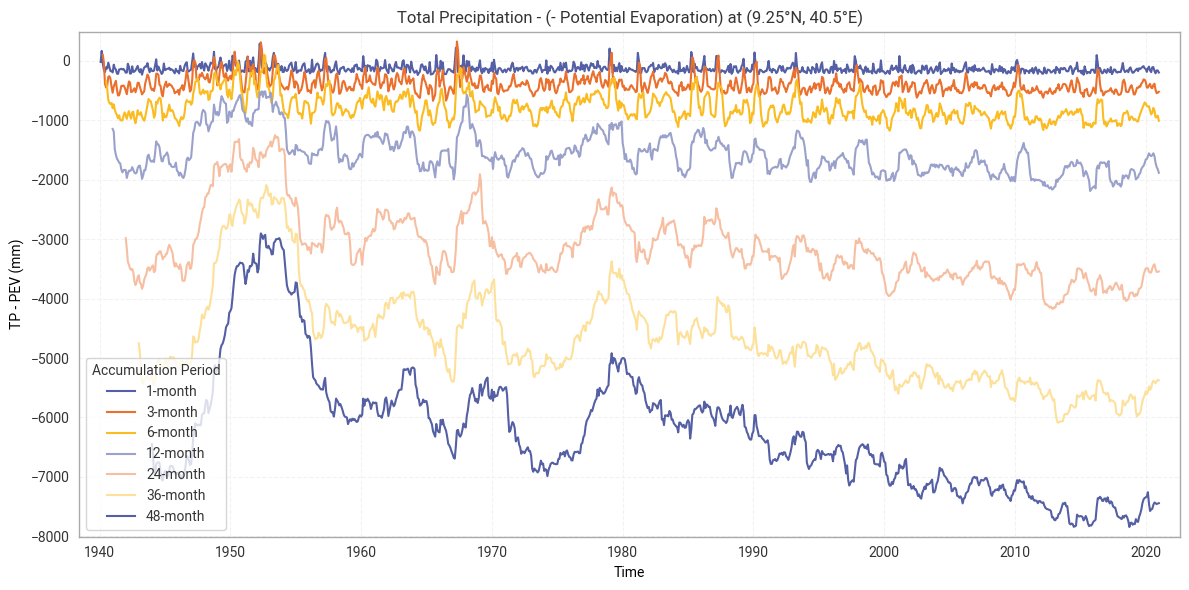

In [50]:
# monthly_diff = monthly_sum_prec_reanal-monthly_sum_pev_reanal


ds_p = monthly_sum_prec_reanal
ds_e = monthly_sum_pev_reanal

# Map matching period variable names between the two datasets
pairs = {
    '1m':  ('tp_mm_accum_1m',  'pev_mm_monthly_total1m'),
    '3m':  ('tp_mm_accum_3m',  'pev_mm_monthly_total3m'),
    '6m':  ('tp_mm_accum_6m',  'pev_mm_monthly_total6m'),
    '12m': ('tp_mm_accum_12m', 'pev_mm_monthly_total12m'),
    '24m': ('tp_mm_accum_24m', 'pev_mm_monthly_total24m'),
    '36m': ('tp_mm_accum_36m', 'pev_mm_monthly_total36m'),
    '48m': ('tp_mm_accum_48m', 'pev_mm_monthly_total48m'),
}

wb_vars = {}


for k, (p_name, e_name) in pairs.items():
    if (p_name in ds_p) and (e_name in ds_e):
        da_p = ds_p[p_name]
        da_e = ds_e[e_name]           # negative totals

        # If dim/coord names differ, rename one side (yours both use 'forecast_reference_time', so likely fine)
        # Example if needed:
        # da_p = da_p.rename({'time': 'forecast_reference_time'})

        # Align by labels to avoid mismatches
        da_p, da_e = xr.align(da_p, da_e, join='inner')

        # Convert PEV to positive PET and compute water balance
        pet_pos = -da_e
        wb      = (da_p - pet_pos).rename(f'wb_mm_accum_{k}')

        wb_vars[wb.name] = wb

# Build a dataset of water-balance variables
wb_ds = xr.Dataset(wb_vars, coords=da_p.coords)
    
# # Assume your dataset is called `data` and already has tp_mm and accumulation variables
# # Example accumulation periods

acc_periods = [1, 3, 6, 12, 24, 36, 48]

# # Select the grid point and time slice for Ethiopia

plt.figure(figsize=(12, 6))
for p in acc_periods:
    var_name = f'wb_mm_accum_{p}m'
    plt.plot(wb_ds['forecast_reference_time'].values, wb_ds[var_name].values, label=f'{p}-month')

# Customize plot
plt.title('Total Precipitation - (- Potential Evaporation) at (9.25°N, 40.5°E)')
plt.xlabel('Time')
plt.ylabel('TP - PEV (mm)')
plt.legend(title='Accumulation Period')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Fit Log-Logistic Distribution to PET

In [51]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]

start_ref, end_ref  = "1991-01-01", "2020-12-01"

# Fit log logistic distributions
log_params = fit_monthly_log_distributions_xr(-wb_ds, accum_periods, start_ref, end_ref)

In [52]:
# Compute SPI series
spei_ds, cdf_ds = compute_monthly_spei_series_xr(-wb_ds, accum_periods, log_params)

In [53]:
dataset = "derived-drought-historical-monthly"
request1 = {
    "variable": ["standardised_precipitation_evapotranspiration_index"],
    "accumulation_period": [
        "1",
        "3",
        "6",
        "12",
        "24",
        "36",
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [9.45, 40.25, 8.95, 40.75]
}

request2 = {
    "variable": ["standardised_precipitation_evapotranspiration_index"],
    "accumulation_period": [
        "1",
        "3",
        "6",
        "12",
        "24",
        "36",
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [9.45, 40.25, 8.95, 40.75]
}


#### Plot Calculated SPEI against ERA5 SPEI

(section-4)=
### 4. Plotting ERA5 SPI - Ensemble 

#### Subsections
Describe what is done in this step/section and what the `code` in the cell does(if code is included).

#### Reading in ERA5 SPI- Ensemble (one location)

In [104]:
dataset = "derived-drought-historical-monthly"
request = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": ["1"],
    "version": "1_0",
    "product_type": ["ensemble_members"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024", "2025"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [41, 9, 40, 10]
}

In [105]:
point_drought_ens_ = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
point_drought_ens_ = point_drought_ens_.to_xarray(compat="equals") # Converts to xarray.

2025-12-15 17:33:48,042 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.


#### Reading in ERA5 SPI- Ensemble (global)

In [39]:
dataset = "derived-drought-historical-monthly"
request = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": ["48"],
    "version": "1_0",
    "product_type": ["ensemble_members"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "2023",
        "2024"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
}

In [ ]:
data_drought_ens = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
data_drought_ens = data_drought_ens.to_xarray(compat="equals") # Converts to xarray.

In [42]:
data_drought_ens

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 240, lat: 721, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 2kB 2023-01-01T06:00:00 ... 2024-12-01T06:...
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Data variables:
    SPI48    (time, lat, lon) float64 2GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes: (12/19)
    CDI:                     Climate Data Interface version 1.9.10 (https://m...
    Conventions:             CF-1.8
    source:                  DRYFALL v1.0
    institution:             European Centre for Medium-Range Weather Forecasts
    title:                   SPI48
    description:             Drought Index: Standardized Drought Index calcul...
    ...                      ...
    climate_end_date:        2020-12-31
    frequency:               Monthly
    contact_person:          support@ecmwf.int
    CDO:                     Climate Data Operators version 1.9.10 (https://m...
    ref_publication:         Keune, J., Di Giuseppe, F., Barnard, C., Damasio...
    cds_data_catalogue_url:  https://cds.climate.copernicus.eu/datasets/deriv...

In [45]:
# data_drought_ens = data_drought_ens.sel(lat=9.25,lon=40.5, method="nearest")

#### Function to create the data into ensemble set.

In [43]:
# Function to reshape time into (time=24, ensemble=10)
def make_ensemble(spi):
    arr = np.asarray(spi)  # Convert memoryview or dask chunk to NumPy
    reshaped = arr.reshape(24, 10)
    return reshaped
 
# Apply across all lat/lon
ensemble = xr.apply_ufunc(
    make_ensemble,
    data_drought_ens["SPI48"],  # DataArray with dims (time, lat, lon)
    input_core_dims=[["time"]],
    output_core_dims=[["time", "ensemble"]],
    exclude_dims={"time"},
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
    dask_gufunc_kwargs={"allow_rechunk": True},
    output_sizes={"time": 24, "ensemble": 10},
)
 
# Assign coordinates
ensemble = ensemble.assign_coords({
    "time": pd.date_range("2023-01-01", periods=24, freq="MS"),
    "ensemble": range(1, 11)
})
ensemble.name = "SPI48"

/tmp/ipykernel_2782/315377700.py:8: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ensemble = xr.apply_ufunc(


#### Selecting ensemble member 1.

In [6]:
ensemble = ensemble.sel(ensemble=1)

In [7]:
ensemble

<xarray.DataArray 'SPI48' (time: 24)> Size: 192B
dask.array<getitem, shape=(24,), dtype=float64, chunksize=(24,), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) datetime64[ns] 192B 2021-01-01 2021-02-01 ... 2022-12-01
    lon       float64 8B 40.5
    lat       float64 8B 9.25
    ensemble  int64 8B 1
Attributes:
    long_name:  Standardized Drought Index (SPI48)

In [22]:
spi_values = ensemble.compute()

#### Calculating mean and stdev over all ensemble members.

In [76]:
ensemble_mean = ensemble.mean(dim="ensemble", skipna=True)  # shape: (lat, lon, time)
ensemble_std = ensemble.std(dim="ensemble", skipna=True)  # shape: (lat, lon, time)

ensemble_mean_time = ensemble_mean.mean(dim="time", skipna=True)  # shape: (lat, lon, time)
ensemble_std_time = ensemble_std.std(dim="time", skipna=True)  # shape: (lat, lon, time)

In [77]:
ensemble_std = ensemble_std.compute()  # Load into memory for plotting
ensemble_std_time = ensemble_std_time.compute() 

/home/eg6/c3s2-eqc-quality-assessment/.venv/lib/python3.12/site-packages/dask/array/numpy_compat.py:58: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [64]:
ensemble_mean = ensemble_mean.compute()  # Load into memory for plotting
ensemble_mean_time = ensemble_mean_time.compute()

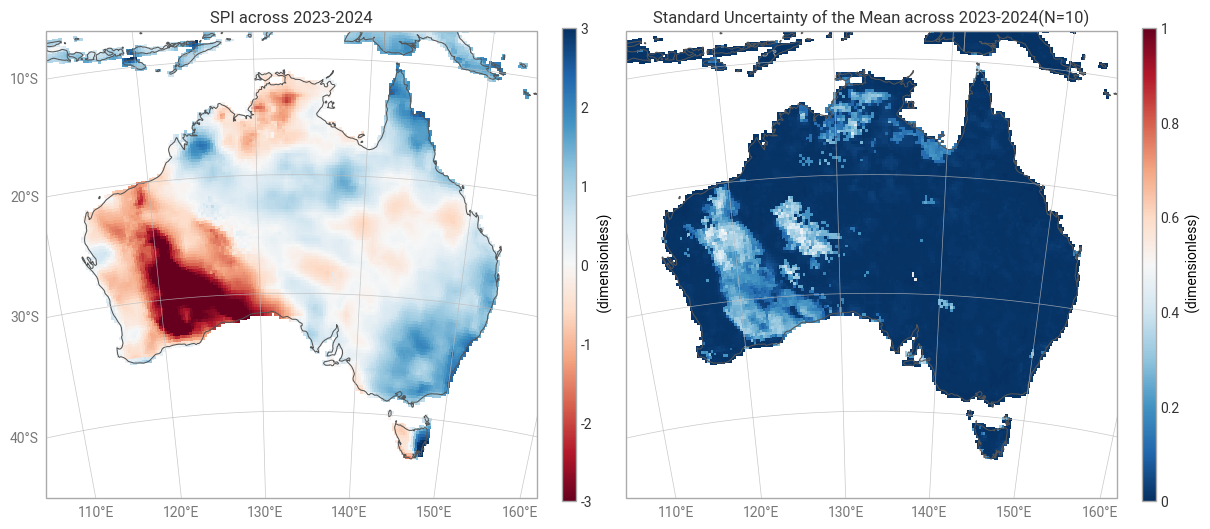

In [80]:
# Select one time slice and one ensemble
from earthkit.plots.styles import Style
SPI_STYLE = Style(cmap=plt.cm.RdBu, vmin=-3, vmax=3, normalize=False)
SPI_SEOM_STYLE = Style(cmap=plt.cm.RdBu_r, vmin=0, vmax=1, normalize=False) # _r for reversing colorbar.

# global_std_map = ensemble_std.sel(time="2024-05-01")  # shape (lat, lon)
# global_mean_map = ensemble_mean.sel(time="2024-05-01")

global_std_map = ensemble_std_time
global_mean_map = ensemble_mean_time

# Convert to NumPy arrays

std_values = global_std_map.to_numpy()/np.sqrt(10)
mean_values = global_mean_map.to_numpy()

lat_values = global_mean_map.lat.to_numpy()
lon_values = global_mean_map.lon.to_numpy()
 
# Create meshgrid

lon_grid, lat_grid = np.meshgrid(lon_values, lat_values)
 
# # Plot with EarthKit

# Create figure with 2 columns
fig = ekp.Figure(rows=1, columns=2, size=(12, 6))  # <-- Important!

# First subplot (left)
subplot = fig.add_map(domain="Australia", row=0, column=0)
subplot.grid_cells(mean_values, x=lon_grid, y=lat_grid,style=SPI_STYLE)
subplot.legend(location="right")

# Second subplot (right)
subplot1 = fig.add_map(domain="Australia", row=0, column=1)
subplot1.grid_cells(std_values, x=lon_grid, y=lat_grid, style = SPI_SEOM_STYLE)
subplot1.legend(location="right")

subplot.title("SPI across 2023-2024")
subplot1.title("Standard Uncertainty of the Mean across 2023-2024(N=10)")

# Add decorations
fig.land()
fig.coastlines()
fig.borders()
fig.gridlines()
fig.show()


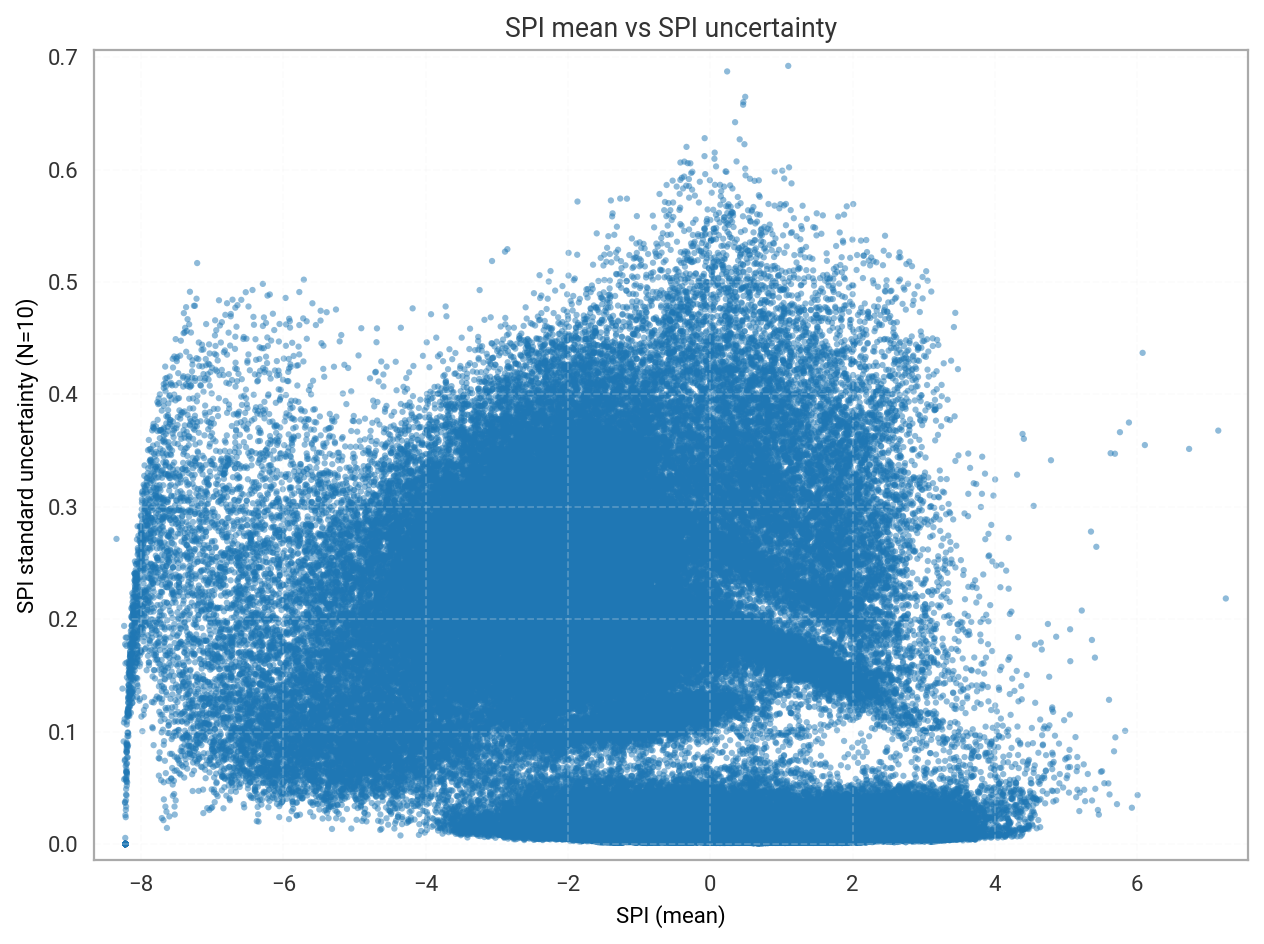

Pearson r = -0.470 (n=371993)


In [103]:
spi_mean = ensemble_mean_time
spi_seom = ensemble_std_time / np.sqrt(10)

# Normalize longitudes to [-180, 180] for both (prevents mismatches near dateline)
def normalize_lon_to_180(da):
    if "lon" in da.coords:
        lon = da["lon"].values
        if lon.max() > 180:
            lon180 = ((lon + 180) % 360) - 180
            da = da.assign_coords(lon=lon180).sortby("lon")
    return da

spi_mean = normalize_lon_to_180(spi_mean)
spi_seom = normalize_lon_to_180(spi_seom)

# Interpolate uncertainty onto mean’s grid (so x,y pairs align 1:1)
spi_seom_on_mean = spi_seom.interp(lat=spi_mean["lat"], lon=spi_mean["lon"], method="nearest")

# Flatten & mask
x = spi_mean.values.ravel()              # SPI mean
y = spi_seom_on_mean.values.ravel()      # SPI standard uncertainty (N=10)
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]; y = y[mask]

# Plot
plt.figure(figsize=(8, 6), dpi=160)
plt.scatter(x, y, s=8, alpha=0.5, color="#1f77b4", edgecolors="none")
plt.xlabel("SPI (mean)")
plt.ylabel("SPI standard uncertainty (N=10)")
plt.title("SPI mean vs SPI uncertainty")
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

# Quick correlation (optional)
if x.size > 0:
    r = np.corrcoef(x, y)[0, 1]
    print(f"Pearson r = {r:.3f} (n={x.size})")


In [ ]:
# collapsable code cell

# code is included for transparency but also learning purposes and gives users the chance to adapt the code used for the assessment as they wish

(section-5)=
### 5. Applying the Ensemble Data

#### Results Subsections

#### Importing in GH Precipitation Station locations.

# PRCP stations in region: 127513


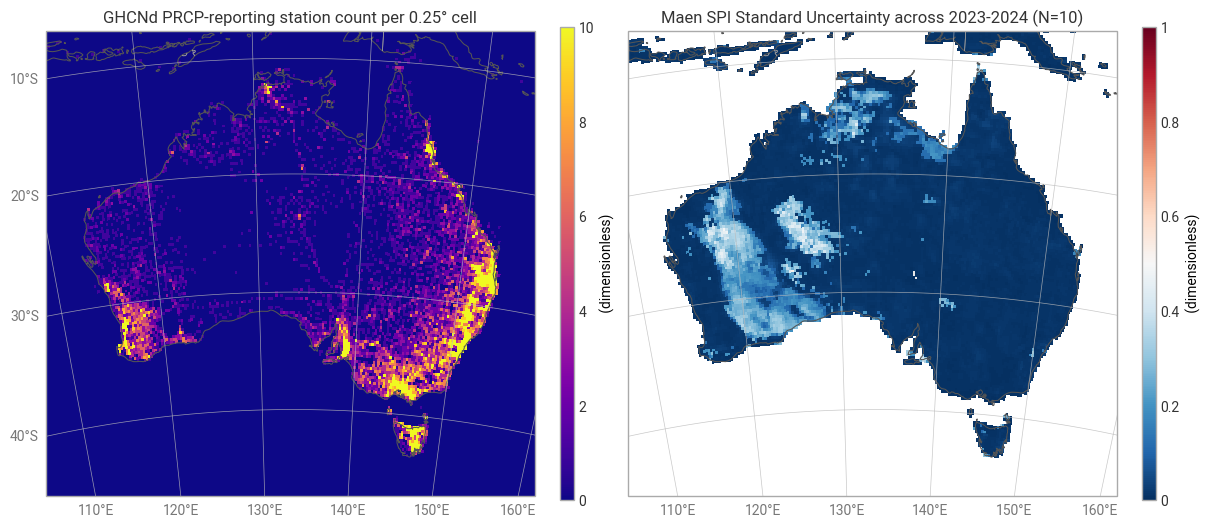

In [72]:

# ============================================================
# LEFT = GHCNd PRCP station counts (May-independent: location map)
# RIGHT = SPI standard uncertainty (N=10)
# ============================================================

# --- Imports ---
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path
from urllib.request import urlopen
import io

import earthkit.plots as ekp
from earthkit.plots.styles import Style

# --- Configuration ---
DOMAIN = "Australia"            # e.g., "Europe", "India", "World" (depends on EarthKit domain presets)
GRID_DEG = 0.25              # target grid resolution for station count
USE_LOCAL = False            # set True if you have the txt files locally
LOCAL_STATIONS = "./ghcnd-stations.txt"
LOCAL_INVENTORY = "./ghcnd-inventory.txt"

# Official NOAA endpoints (with AWS mirror fallback)
NCEI_STATIONS_URL  = "https://www.ncei.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt"
NCEI_INVENTORY_URL = "https://www.ncei.noaa.gov/pub/data/ghcn/daily/ghcnd-inventory.txt"
AWS_STATIONS_URL   = "https://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-stations.txt"
AWS_INVENTORY_URL  = "https://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-inventory.txt"

# --- 0) Check SPI inputs ---
try:
    ensemble_mean, ensemble_std
except NameError as e:
    raise RuntimeError(
        "Expected 'ensemble_mean' and 'ensemble_std' to be defined "
        "(xarray DataArrays with coords: time, lat, lon)."
    ) from e

# Select SPI fields for your date and prepare arrays/mesh
# spi_date = "2024-05-01"
global_std_map  = ensemble_std  # (lat, lon)
lat_values      = global_std_map.lat.to_numpy()
lon_values      = global_std_map.lon.to_numpy()
std_values      = global_std_map.to_numpy() / np.sqrt(10)

lon_grid, lat_grid = np.meshgrid(lon_values, lat_values)

# --- 1) Read GHCNd station & inventory text files ---
def read_text(primary, fallback=None):
    try:
        with urlopen(primary) as r:
            return r.read().decode("utf-8", errors="ignore")
    except Exception:
        if fallback:
            with urlopen(fallback) as r:
                return r.read().decode("utf-8", errors="ignore")
        raise

if USE_LOCAL and Path(LOCAL_STATIONS).exists():
    stations_text = Path(LOCAL_STATIONS).read_text(encoding="utf-8", errors="ignore")
else:
    stations_text = read_text(NCEI_STATIONS_URL, AWS_STATIONS_URL)

if USE_LOCAL and Path(LOCAL_INVENTORY).exists():
    inventory_text = Path(LOCAL_INVENTORY).read_text(encoding="utf-8", errors="ignore")
else:
    inventory_text = read_text(NCEI_INVENTORY_URL, AWS_INVENTORY_URL)

# Parse station metadata: ID, lat, lon (first three whitespace tokens suffice)
stations_df = pd.read_csv(
    io.StringIO(stations_text),
    sep=r"\s+",
    header=None,
    usecols=[0, 1, 2],
    names=["station_id", "lat", "lon"],
    dtype={"station_id": str, "lat": float, "lon": float},
    engine="python"
)

# Parse inventory: id, lat, lon, element, first, last (may be YYYY or YYYYMMDD)
inv_df = pd.read_csv(
    io.StringIO(inventory_text),
    sep=r"\s+",
    header=None,
    names=["station_id", "lat_inv", "lon_inv", "element", "first", "last"],
    dtype={"station_id": str, "lat_inv": float, "lon_inv": float, "element": str, "first": str, "last": str},
    engine="python"
)

# Keep only PRCP and deduplicate stations
inv_prcp = inv_df[inv_df["element"] == "PRCP"].copy()
prcp_stations = inv_prcp[["station_id"]].drop_duplicates().merge(
    stations_df, on="station_id", how="left"
).dropna(subset=["lat", "lon"]).reset_index(drop=True)

# --- Optional: restrict to Europe bounding box to reduce clutter/dark plots ---
# You can skip this if DOMAIN already clips visually.
EU_BOUNDS = {"lat_min": 25, "lat_max": 72, "lon_min": -25, "lon_max": 45}  # rough bounds
if DOMAIN == "Europe":
    prcp_stations = prcp_stations[
        (prcp_stations["lat"] >= EU_BOUNDS["lat_min"]) & (prcp_stations["lat"] <= EU_BOUNDS["lat_max"]) &
        (prcp_stations["lon"] >= EU_BOUNDS["lon_min"]) & (prcp_stations["lon"] <= EU_BOUNDS["lon_max"])
    ].copy()

print(f"# PRCP stations in region: {len(prcp_stations)}")

# --- 2) Bin PRCP stations onto a 0.25° grid ---
lat_edges = np.arange(-90.0,  90.0 + GRID_DEG, GRID_DEG)
lon_edges = np.arange(-180.0, 180.0 + GRID_DEG, GRID_DEG)
H, _, _ = np.histogram2d(prcp_stations["lat"].values, prcp_stations["lon"].values,
                         bins=[lat_edges, lon_edges])

# Convert counts to an xarray DataArray on grid cell centers
lat_centers = (lat_edges[:-1] + lat_edges[1:]) / 2
lon_centers = (lon_edges[:-1] + lon_edges[1:]) / 2
counts_da = xr.DataArray(H, coords={"lat": lat_centers, "lon": lon_centers}, dims=("lat", "lon"))

# Interpolate the counts to your SPI grid (nearest preserves integer counts)
counts_on_spi = counts_da.interp(lat=lat_values, lon=lon_values, method="nearest")
gauge_values  = counts_on_spi.to_numpy()

# --- 3) Styles (choose readable limits to avoid too dark visuals) ---
# Use a fixed scale; adjust vmax if you see higher values in your region.
vmax_est = max(10, float(np.nanpercentile(gauge_values, 99)))
GAUGE_STYLE   = Style(cmap=plt.cm.plasma, vmin=0, vmax=vmax_est, normalize=False)
SPI_SEOM_STYLE = Style(cmap=plt.cm.RdBu_r, vmin=0, vmax=1, normalize=False)  # std uncertainty

# --- 4) Create EarthKit figure & maps (side-by-side) ---
fig = ekp.Figure(rows=1, columns=2, size=(12, 6))

# LEFT: PRCP station counts (per 0.25° cell, regridded to SPI mesh)
subplot_left = fig.add_map(domain=DOMAIN, row=0, column=0)
subplot_left.grid_cells(gauge_values, x=lon_grid, y=lat_grid, style=GAUGE_STYLE)
subplot_left.legend(location="right")
subplot_left.title("GHCNd PRCP-reporting station count per 0.25° cell")

# RIGHT: SPI standard uncertainty (N=10)
subplot_right = fig.add_map(domain=DOMAIN, row=0, column=1)
subplot_right.grid_cells(std_values, x=lon_grid, y=lat_grid, style=SPI_SEOM_STYLE)
subplot_right.legend(location="right")
subplot_right.title(f"Maen SPI Standard Uncertainty across 2023-2024 (N=10)")

# Decorations and render
fig.land()
fig.coastlines()
fig.borders()
fig.gridlines()
fig.show()



#### Elevation vs SPI uncertainty.

In [7]:
dataset = "reanalysis-era5-land"
request = {
    "variable": ["geopotential"],
    "data_format": "netcdf",
    "download_format": "unarchived"
}


In [11]:
geo_pot = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
geo_pot = geo_pot.to_xarray() # Converts to xarray.


2025-12-15 14:37:48,902 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.


In [74]:
from earthkit.plots.styles import Style

SPI_SEOM_STYLE = Style(cmap=plt.cm.RdBu_r, vmin=0, vmax=1, normalize=False) # _r for reversing colorbar.

RB_STYLE = Style(cmap=plt.cm.RdBu_r, normalize=False)  # let data drive the range

geo_pot["h"] = geo_pot["z"]/9.81

global_map = geo_pot["h"] 

global_map.name = "height"
fig = ekp.Figure(rows=1, columns=1, size=(8, 6))

global_map.attrs["units"] = "m"
global_map.attrs["long_name"] = "Height above sea level"

# Convert to NumPy arrays
global_std_map = ensemble_std_time
std_values = global_std_map.to_numpy()/np.sqrt(10)
lat_values = global_std_map.lat.to_numpy()
lon_values = global_std_map.lon.to_numpy()
 
# Create meshgrid

lon_grid, lat_grid = np.meshgrid(lon_values, lat_values)
 
# # Plot with EarthKit

# Create figure with 2 columns
fig = ekp.Figure(rows=1, columns=2, size=(12, 6))  # <-- Important!

# First subplot (left)
subplot = fig.add_map(domain="Australia", row=0, column=0)
subplot.grid_cells(global_map, style= RB_STYLE)
subplot.legend(location="right")

# Second subplot (right)
subplot1 = fig.add_map(domain="Australia", row=0, column=1)
subplot1.grid_cells(std_values, x=lon_grid, y=lat_grid, style = SPI_SEOM_STYLE)
subplot1.legend(location="right")

subplot.title("Elevation map (m)")
subplot1.title("Standard Uncertainty of the Mean across 2023-2024 (N=10)")

# Add decorations
fig.land()
fig.coastlines()
fig.borders()
fig.gridlines()
fig.show()


NameError: name 'ensemble_std_time' is not defined

<Figure size 800x600 with 0 Axes>

In [87]:
# --- Domain bounds (Australia) ---

# --- Domain bounds (Australia example) ---
DOMAIN = "Australia"
BOUNDS = {
    "Australia": {"lat_min": -45, "lat_max": -10, "lon_min": 110, "lon_max": 155},    
    "Europe":    {"lat_min": 25,  "lat_max": 72,  "lon_min": -25,  "lon_max": 45},
    # add others if needed...
}

bounds = BOUNDS[DOMAIN]
MARGIN = 2.0  # degrees

# ✅ Correct, uncluttered assignments
lat_min = bounds["lat_min"] - MARGIN
lat_max = bounds["lat_max"] + MARGIN
lon_min = bounds["lon_min"] - MARGIN
lon_max = bounds["lon_max"] + MARGIN

# --- Grid centers from edges ---
lat_centers = 0.5 * (lat_edges[:-1] + lat_edges[1:])
lon_centers = 0.5 * (lon_edges[:-1] + lon_edges[1:])

# Subset to domain
lat_mask = (lat_centers >= lat_min) & (lat_centers <= lat_max)
lon_mask = (lon_centers >= lon_min) & (lon_centers <= lon_max)

lat_centers_sub = lat_centers[lat_mask]
lon_centers_sub = lon_centers[lon_mask]

# Meshgrid + longitude normalization (to [-180, 180])
lonc2d_sub, latc2d_sub = np.meshgrid(lon_centers_sub, lat_centers_sub)
lonc2d_sub_norm = ((lonc2d_sub + 180) % 360) - 180

# Filter stations to the same box
stations_dom = prcp_stations[
    (prcp_stations["lat"] >= lat_min) & (prcp_stations["lat"] <= lat_max) &
    (prcp_stations["lon"] >= lon_min) & (prcp_stations["lon"] <= lon_max)
].copy()
stations_dom["lon"] = ((stations_dom["lon"] + 180) % 360) - 180  # normalize station lons

if stations_dom.empty:
    raise RuntimeError("No PRCP stations found in the selected domain after filtering.")

stations_lat = stations_dom["lat"].to_numpy()
stations_lon = stations_dom["lon"].to_numpy()
stations_lon = ((stations_lon + 180) % 360) - 180  # ✅ normalize stations

# --- Nearest neighbor (KD-tree if available; else chunked haversine) ---
EARTH_RADIUS_KM = 6371.0
nlat_sub, nlon_sub = latc2d_sub.shape

nearest_station_index = np.empty((nlat_sub, nlon_sub), dtype=np.int32)
nearest_distance_km   = np.empty((nlat_sub, nlon_sub), dtype=np.float32)

try:
    from scipy.spatial import cKDTree

    def sph2xyz(lat_deg, lon_deg):
        lat_rad = np.deg2rad(lat_deg)
        lon_rad = np.deg2rad(lon_deg)
        x = np.cos(lat_rad) * np.cos(lon_rad)
        y = np.cos(lat_rad) * np.sin(lon_rad)
        z = np.sin(lat_rad)
        return np.column_stack([x, y, z])

    station_xyz = sph2xyz(stations_lat, stations_lon)                   # (Ns, 3)
    grid_xyz    = sph2xyz(latc2d_sub.ravel(), lonc2d_sub_norm.ravel())  # (Ng, 3)

    tree = cKDTree(station_xyz)
    _, idx = tree.query(grid_xyz, k=1)

    # Accurate haversine distance for the nearest candidate
    phi1 = np.deg2rad(latc2d_sub.ravel())
    lam1 = np.deg2rad(lonc2d_sub_norm.ravel())
    phi2 = np.deg2rad(stations_lat[idx])
    lam2 = np.deg2rad(stations_lon[idx])
    dphi = phi2 - phi1
    dlam = lam2 - lam1
    a = np.sin(dphi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlam / 2.0) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1.0 - a))
    dist_km_flat = (EARTH_RADIUS_KM * c).astype(np.float32)

    nearest_station_index[:] = idx.reshape(nlat_sub, nlon_sub)
    nearest_distance_km[:]   = dist_km_flat.reshape(nlat_sub, nlon_sub)

except Exception:
    # Memory‑safe chunked haversine fallback (no sklearn/scipy)
    BR, BC = 32, 32  # block size (tune if needed)
    stations_lat32 = stations_lat.astype(np.float32)
    stations_lon32 = stations_lon.astype(np.float32)

    for i0 in range(0, nlat_sub, BR):
        i1 = min(i0 + BR, nlat_sub)
        for j0 in range(0, nlon_sub, BC):
            j1 = min(j0 + BC, nlon_sub)

            lat_blk = latc2d_sub[i0:i1, j0:j1].astype(np.float32)
            lon_blk = lonc2d_sub_norm[i0:i1, j0:j1].astype(np.float32)

            phi1 = np.deg2rad(lat_blk)[..., None]                  # (br, bc, 1)
            lam1 = np.deg2rad(lon_blk)[..., None]
            phi2 = np.deg2rad(stations_lat32)[None, None, :]       # (1, 1, Ns)
            lam2 = np.deg2rad(stations_lon32)[None, None, :]

            dphi = phi2 - phi1
            dlam = lam2 - lam1
            a = np.sin(dphi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlam / 2.0) ** 2
            c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1.0 - a))
            D = (EARTH_RADIUS_KM * c).astype(np.float32)           # (br, bc, Ns)

            idx_blk  = np.argmin(D, axis=-1).astype(np.int32)
            dist_blk = np.take_along_axis(D, idx_blk[..., None], axis=-1)[..., 0]

            nearest_station_index[i0:i1, j0:j1] = idx_blk
            nearest_distance_km[i0:i1, j0:j1]   = dist_blk

# --- Package as xarray & (optionally) plot ---
nearest_station_lat = stations_lat[nearest_station_index]
nearest_station_lon = stations_lon[nearest_station_index]

nearest_ds = xr.Dataset(
    {
        "nearest_station_index": (("lat", "lon"), nearest_station_index),
        "nearest_distance_km":   (("lat", "lon"), nearest_distance_km),
        "nearest_station_lat":   (("lat", "lon"), nearest_station_lat),
        "nearest_station_lon":   (("lat", "lon"), nearest_station_lon),
    },
    coords={"lat": lat_centers_sub, "lon": lon_centers_sub},
)

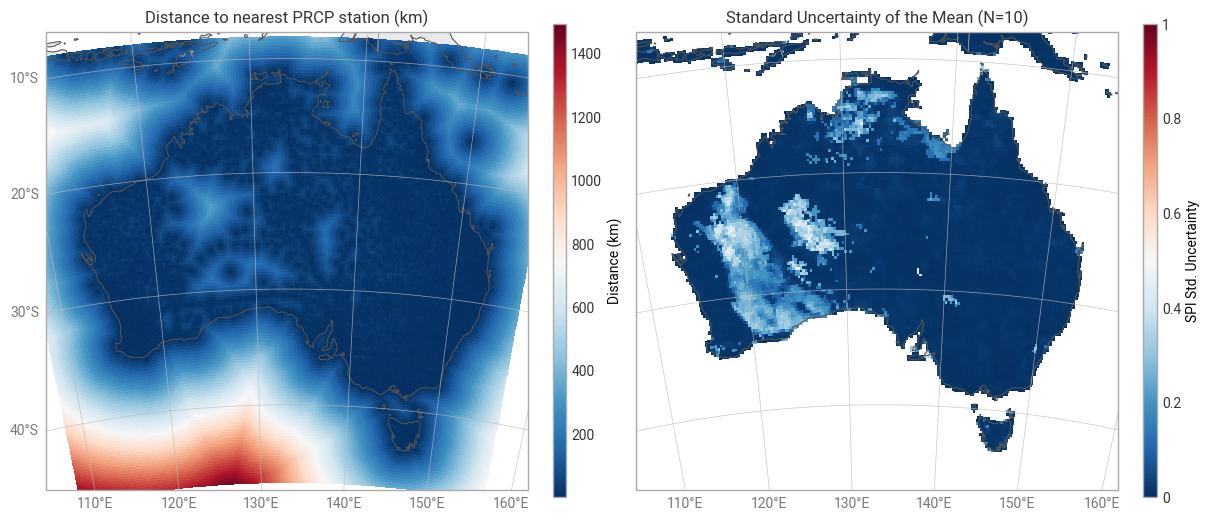

In [101]:
nearest_ds["nearest_distance_km"].attrs.update(
    long_name="Distance to nearest PRCP station",
    units="km"
)

# Create a 2-column figure (Australia left, SPI right)
fig = ekp.Figure(rows=1, columns=2, size=(12, 6))

# --- Left subplot: nearest station distance (Australia) ---
subplot = fig.add_map(domain="Australia", row=0, column=0)
m_left = subplot.grid_cells(nearest_ds["nearest_distance_km"], style=RB_STYLE)
subplot.title("Distance to nearest PRCP station (km)")
subplot.legend(location="right")
# Optional: show a colorbar label to explain colours
cbar_left = getattr(m_left, "colour_bar", None) or getattr(m_left, "color_bar", None) or getattr(m_left, "colorbar", None)
if cbar_left is not None:
    cbar_left.set_label("Distance (km)")

subplot1 = fig.add_map(domain="Australia", row=0, column=1)
m_right = subplot1.grid_cells(std_values, x=lon_grid, y=lat_grid, style=SPI_SEOM_STYLE)
subplot1.title("Standard Uncertainty of the Mean (N=10)")
subplot1.legend(location="right")
cbar_right = getattr(m_right, "colour_bar", None) or getattr(m_right, "color_bar", None) or getattr(m_right, "colorbar", None)
if cbar_right is not None:
    cbar_right.set_label("SPI Std. Uncertainty")

# --- Decorations and render (applied to both panels) ---
fig.land()
fig.coastlines()
fig.borders()
fig.gridlines()

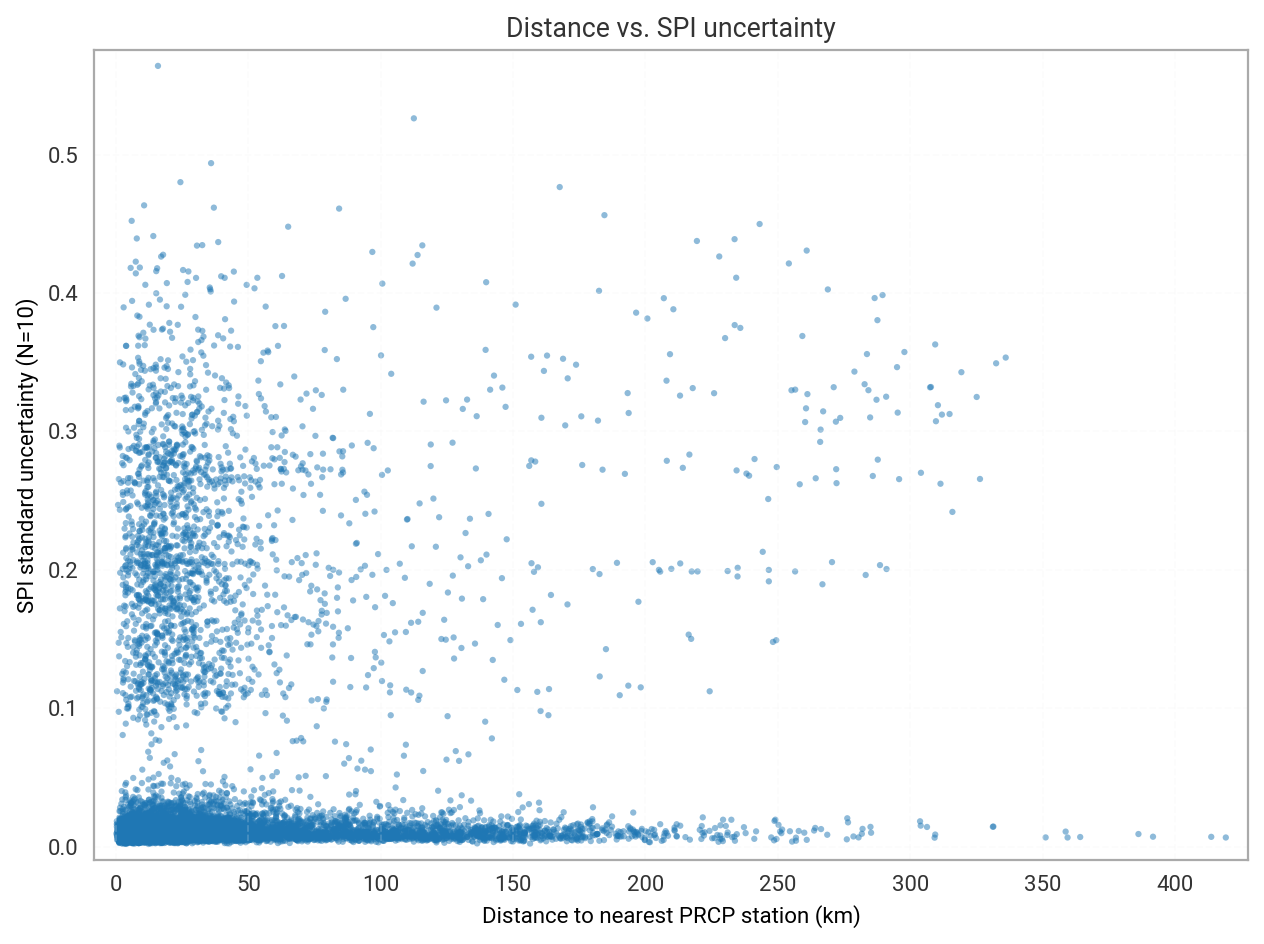

In [100]:

import numpy as np
import matplotlib.pyplot as plt

# 1) Pick your domain grid (either Australia or Europe dataset you computed)
dist_da = nearest_ds["nearest_distance_km"]  # (lat, lon) in km

# 2) Select SPI uncertainty on the same date & convert to std. uncertainty (N=10 here)
spi_da = ensemble_std_time / np.sqrt(10)

# 3) Make sure longitudes use the same range; align and interpolate onto distance grid
def normalize_lon_to_180(da):
    if "lon" in da.coords:
        lon = da["lon"].values
        if lon.max() > 180:
            lon180 = ((lon + 180) % 360) - 180
            da = da.assign_coords(lon=lon180).sortby("lon")
    return da

spi_da = normalize_lon_to_180(spi_da)
dist_da = normalize_lon_to_180(dist_da)

# Interpolate SPI uncertainty to the distance grid
spi_on_dist_grid = spi_da.interp(lat=dist_da["lat"], lon=dist_da["lon"], method="nearest")

# 4) Flatten & mask NaNs
x = dist_da.values.ravel()                # distance (km)
y = spi_on_dist_grid.values.ravel()       # SPI uncertainty
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]; y = y[mask]

# 5) Plot: scatter
plt.figure(figsize=(8, 6), dpi=160)
plt.scatter(x, y, s=8, alpha=0.5, color="#1f77b4", edgecolors="none")
plt.xlabel("Distance to nearest PRCP station (km)")
plt.ylabel("SPI standard uncertainty (N=10)")
plt.title("Distance vs. SPI uncertainty")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# (Optional) quick stats
if x.size > 0:
    r = np.corrcoef(x, y)[0, 1]


#### Calculating SPI- Ensemble

In [126]:
dataset = "reanalysis-era5-single-levels-monthly-means"
request = {
    "product_type": ["monthly_averaged_ensemble_members"],
    "variable": ["total_precipitation"],
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024", "2025"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "grib",
    "download_format": "unarchived"
}


In [127]:
tp_ens = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
tp_ens = tp_ens.to_xarray() # Converts to xarray.
tp_ens = tp_ens.assign_coords(number=tp_ens.number + 1)

2025-12-15 17:52:59,235 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.


In [128]:
tp_ens_sel = tp_ens.sel(latitude=9.5, longitude=40.5, method='nearest')

In [107]:
point_drought_ens_ = point_drought_ens_.sel(lon = 9.5, lat = 40.5)

In [120]:
def make_ensemble(da, time_dim="time", member_dim="member"):
    times = pd.Index(da[time_dim].values)
    member_ids = pd.Series(times).groupby(times).cumcount().to_numpy()
    
    # Create MultiIndex
    mi = pd.MultiIndex.from_arrays([times, member_ids], names=[time_dim, member_dim])
    
    # Assign MultiIndex and rename the dimension to something temporary
    da = da.rename({time_dim: "tmp"}).assign_coords(tmp=mi)
    
    # Unstack to get (time, member)
    return da.unstack()



In [121]:
ens = make_ensemble(point_drought_ens_["SPI1"])  # or pass the whole Dataset

/tmp/ipykernel_2782/4055141194.py:9: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'tmp' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  da = da.rename({time_dim: "tmp"}).assign_coords(tmp=mi)


In [138]:
point_ens_std = ens.std(dim = "member")
point_ens_mean = ens.mean(dim = "member")

# Make a clean time vs stdev plot
plt.figure(figsize=(10, 5))
plt.scatter(point_ens_mean.values, point_ens_std.values, color='tab:blue')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Ensemble spread of total precipitation over time.

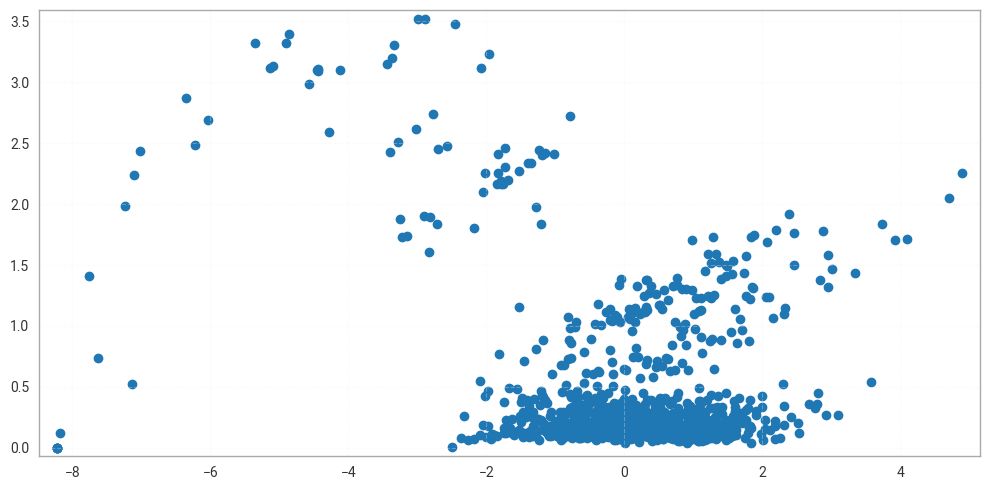

In [146]:
# Compute stdev across ensemble members (dimension: 'number')
tp_ens_sel = tp_ens_sel.sel(forecast_reference_time = slice('1940-01-31T18:00:00.000000000','2025-09-30T18:00:00.000000000'))
tp_std = tp_ens_sel['tp'].std(dim='number')  # result dims: (forecast_reference_time)
tp_mean = tp_ens_sel['tp'].mean(dim='number')  # result dims: (forecast_reference_time)

# Make a clean time vs stdev plot
plt.figure(figsize=(10, 5))
plt.scatter(point_ens_mean.values, point_ens_std.values, color='tab:blue')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### Ensemble spread along with 48-month rolling average in tp.

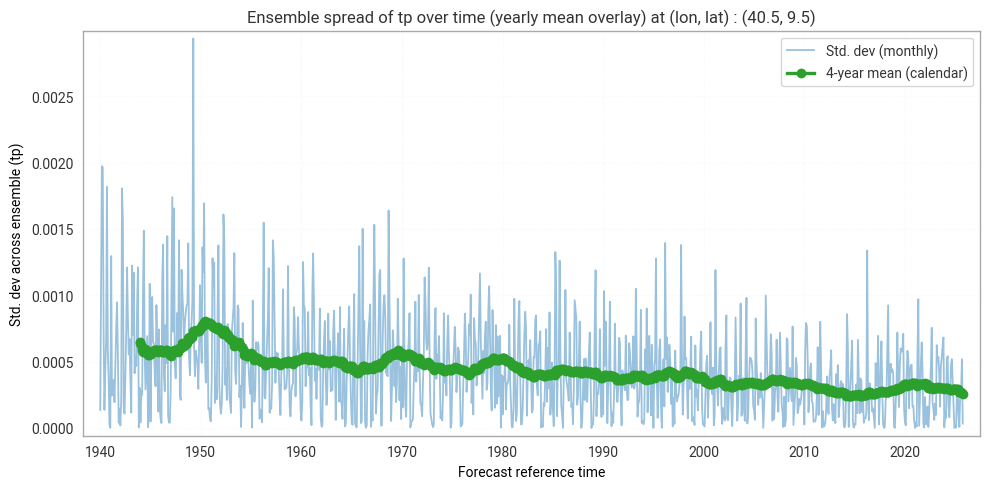

In [68]:

# Compute stdev across ensemble members
tp_std = tp_ens_sel['tp'].std(dim='number')

tp_std_monthly = tp_std.rolling(
    forecast_reference_time=48, center=False, min_periods=48
).mean()


plt.figure(figsize=(10, 5))
plt.plot(tp_std['forecast_reference_time'].values, tp_std.values,
         color='tab:blue', lw=1.3, alpha=0.45, label='Std. dev (monthly)')
plt.plot(tp_std_monthly['forecast_reference_time'].values, tp_std_monthly.values,
         color='tab:green', lw=2.4, marker='o', label='4-year mean (calendar)')

plt.xlabel("Forecast reference time")
plt.ylabel("Std. dev across ensemble (tp)")
plt.title("Ensemble spread of tp over time (yearly mean overlay) at (lon, lat) : (40.5, 9.5)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()


In [18]:
tp_ens_sel = tp_ens_sel.sel(number=1)
era5_monthly_sum_ens = process_precipitation(tp_ens_sel)

In [22]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]

start_ref, end_ref  = "1991-01-01", "2020-12-01"

# Fit gamma distributions
gamma_params = fit_monthly_gamma_distributions_xr(era5_monthly_sum_ens, accum_periods, start_ref, end_ref)

In [23]:
# Compute SPI series
# era5_monthly_sum_ens.sel(forecast_reference_time = slice()
spi_ens_ds, cdf_ens_ds = compute_monthly_spi_series_xr(era5_monthly_sum_ens, accum_periods, gamma_params)

In [ ]:
plt.figure(figsize=(12, 6))
accum_periods=[48]
for period in accum_periods:
    # plt.plot(spi_calculated_monthly_shifted[f"SPI{period}"],spi_calculated_monthly_shifted[f"SPI{period}"]-data_drought[f"SPI{period}"], label=f"Calculated-SPI{period}")
    plt.plot(spi_values, label=f"ERA5_Drought-SPI{period}")
    plt.plot(spi_ens_ds[f"SPI_{period}m"].sel(forecast_reference_time=slice("2021-01-01", "2023-01-01")), label=f"Calculated SPI{period}")
    
plt.legend()
plt.title("Ensemble #1 Member Standardised Precipitation Index in SPI12")
plt.xlabel("Date")
plt.ylabel("SPI Value")
plt.grid(True)
plt.show()

In [ ]:
# collapsable code cell

# code is included for transparency but also learning purposes and gives users the chance to adapt the code used for the assessment as they wish

## ℹ️ If you want to know more

### Key resources

List some key resources related to this assessment. E.g. CDS entries, applications, dataset documentation, external pages.
Also list any code libraries used (if applicable).

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)

### References

List the references used in the Notebook here.

E.g.

[[1]](https://doi.org/10.1038/s41598-018-20628-2) Rodriguez, D., De Voil, P., Hudson, D., Brown, J. N., Hayman, P., Marrou, H., & Meinke, H. (2018). Predicting optimum crop designs using crop models and seasonal climate forecasts. Scientific reports, 8(1), 2231.